In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
match = pd.read_csv('matches_updated.csv')
delivery = pd.read_csv('modified_deliveries.csv')

In [3]:
try:
    match = pd.read_csv('matches_updated.csv')
    delivery = pd.read_csv('modified_deliveries.csv')
except FileNotFoundError as e:
    print(f"Error: {e}")


In [4]:
match.shape

(1095, 20)

In [5]:
match.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,1,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chin1swamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223.0,20,N,1,Asad Rauf,RE Koertzen
1,2,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241.0,20,N,1,MR Benson,SL Shastri
2,3,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130.0,20,N,1,Aleem Dar,GA Pratapkumar
3,4,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166.0,20,N,1,SJ Davis,DJ Harper
4,5,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111.0,20,N,1,BF Bowden,K Hariharan


In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
delivery.shape

(260920, 17)

In [8]:
total_score_df = delivery.groupby(['match_id', 'inning'])['total_runs'].sum().add(1).reset_index()


In [9]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
total_score_df


,match_id,inning,total_runs
0,1,1,223
2,2,1,241
4,3,1,130
6,4,1,166
8,5,1,111
...,...,...,...
2207,1091,1,215
2209,1092,1,160
2211,1093,1,173
2213,1094,1,176


In [11]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='match_id',right_on='match_id')

In [12]:
match_df


,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,total_runs
0,1,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chin1swamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140,223.0,20,N,1,Asad Rauf,RE Koertzen,223
1,2,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33,241.0,20,N,1,MR Benson,SL Shastri,241
2,3,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9,130.0,20,N,1,Aleem Dar,GA Pratapkumar,130
3,4,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5,166.0,20,N,1,SJ Davis,DJ Harper,166
4,5,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5,111.0,20,N,1,BF Bowden,K Hariharan,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1091,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi Inter1tio1l Stadium, Uppal, Hyder...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4,215.0,20,N,1,Nitin Menon,VK Sharma,215
1091,1092,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"1rendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8,160.0,20,N,1,AK Chaudhary,R Pandit,160
1092,1093,2024,Ahmedabad,22-05-2024,Elimi1tor,R Ashwin,"1rendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,wickets,4,173.0,20,N,1,KN A1nthapadma1bhan,MV Saidharshan Kumar,173
1093,1094,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36,176.0,20,N,1,Nitin Menon,VK Sharma,176


In [13]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [14]:
teams = ['Royal Challengers Bangalore','Punjab Kings','Mumbai Indians','Kolkata Knight Riders','Rajasthan Royals','Chennai Super Kings','Sunrisers Hyderabad','Delhi Capitals','Lucknow Super Giants','Gujarat Titans']

In [15]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Royal Challengers Benaluru','Royal Challengers Bangalore')
match_df['team2']=match_df['team2'].str.replace('Royal Challengers Benaluru','Royal Challengers Bangalore')

match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [16]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team1'].isin(teams)]

In [17]:
match_df.shape

(1026, 21)

In [18]:
match_df


,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,total_runs
0,1,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chin1swamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140,223.0,20,N,1,Asad Rauf,RE Koertzen,223
1,2,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33,241.0,20,N,1,MR Benson,SL Shastri,241
2,3,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9,130.0,20,N,1,Aleem Dar,GA Pratapkumar,130
3,4,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5,166.0,20,N,1,SJ Davis,DJ Harper,166
4,5,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,Kolkata Knight Riders,wickets,5,111.0,20,N,1,BF Bowden,K Hariharan,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1089,2024,Mumbai,17-05-2024,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,...,Lucknow Super Giants,runs,18,215.0,20,N,1,1vdeep Singh,R Pandit,215
1090,1091,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi Inter1tio1l Stadium, Uppal, Hyder...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4,215.0,20,N,1,Nitin Menon,VK Sharma,215
1091,1092,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"1rendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8,160.0,20,N,1,AK Chaudhary,R Pandit,160
1093,1094,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36,176.0,20,N,1,Nitin Menon,VK Sharma,176


In [19]:
match_df

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,total_runs
0,1,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chin1swamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140,223.0,20,N,1,Asad Rauf,RE Koertzen,223
1,2,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33,241.0,20,N,1,MR Benson,SL Shastri,241
2,3,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9,130.0,20,N,1,Aleem Dar,GA Pratapkumar,130
3,4,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5,166.0,20,N,1,SJ Davis,DJ Harper,166
4,5,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,Kolkata Knight Riders,wickets,5,111.0,20,N,1,BF Bowden,K Hariharan,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1089,2024,Mumbai,17-05-2024,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,...,Lucknow Super Giants,runs,18,215.0,20,N,1,1vdeep Singh,R Pandit,215
1090,1091,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi Inter1tio1l Stadium, Uppal, Hyder...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4,215.0,20,N,1,Nitin Menon,VK Sharma,215
1091,1092,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"1rendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8,160.0,20,N,1,AK Chaudhary,R Pandit,160
1093,1094,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36,176.0,20,N,1,Nitin Menon,VK Sharma,176


In [20]:
match_df['method'].unique()

array(['1', 'DL'], dtype=object)

In [21]:
match_df=match_df[match_df['method'] == '1']

In [22]:
match_df


,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,total_runs
0,1,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chin1swamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140,223.0,20,N,1,Asad Rauf,RE Koertzen,223
1,2,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33,241.0,20,N,1,MR Benson,SL Shastri,241
2,3,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9,130.0,20,N,1,Aleem Dar,GA Pratapkumar,130
3,4,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5,166.0,20,N,1,SJ Davis,DJ Harper,166
4,5,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,Kolkata Knight Riders,wickets,5,111.0,20,N,1,BF Bowden,K Hariharan,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1089,2024,Mumbai,17-05-2024,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,...,Lucknow Super Giants,runs,18,215.0,20,N,1,1vdeep Singh,R Pandit,215
1090,1091,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi Inter1tio1l Stadium, Uppal, Hyder...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4,215.0,20,N,1,Nitin Menon,VK Sharma,215
1091,1092,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"1rendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8,160.0,20,N,1,AK Chaudhary,R Pandit,160
1093,1094,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36,176.0,20,N,1,Nitin Menon,VK Sharma,176


In [23]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [24]:
delivery_df=match_df.merge(delivery,on='match_id')

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241216,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
241217,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
241218,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
241219,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [26]:
delivery_df=delivery_df[delivery_df['inning'] == 2]

In [27]:
delivery_df.shape

(116632, 20)

In [28]:
delivery_df['current_score'] = delivery_df[delivery_df['inning'] == 2].groupby('match_id')['total_runs_y'].cumsum()


C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\4272949646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df[delivery_df['inning'] == 2].groupby('match_id')['total_runs_y'].cumsum()


In [29]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\3239114318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']


In [30]:
delivery_df['balls_left']=120-(delivery_df['over']*6 + delivery_df['ball'])

C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\1980926710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left']=120-(delivery_df['over']*6 + delivery_df['ball'])


In [31]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,221,118
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,221,117
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,220,116
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241216,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,4,61
241217,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,3,60
241218,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,2,59
241219,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,1,58


In [32]:

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0").apply(lambda x: 0 if x == "0" else 1).astype(int)
delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df.head()


C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\4172934527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0").apply(lambda x: 0 if x == "0" else 1).astype(int)
C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\4172934527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['player_dismissed'].cumsum()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,222,119,10
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,221,118,10
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,221,117,10
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,220,116,10
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,219,115,10


In [33]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
241216,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,4,61,8
241217,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,3,60,8
241218,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,2,59,8
241219,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,1,58,8
241220,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,0,57,8


In [34]:
delivery_df['crr']=delivery_df['current_score']*6/(120-delivery_df['balls_left'])

C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\1805737169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr']=delivery_df['current_score']*6/(120-delivery_df['balls_left'])


In [35]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\3992153924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']


In [36]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,222,119,10,6.000000,11.193277
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,221,118,10,6.000000,11.237288
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,221,117,10,4.000000,11.333333
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,220,116,10,4.500000,11.379310
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,219,115,10,4.800000,11.426087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241216,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,0,NaN,NaN,110,4,61,8,11.186441,0.393443
241217,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,NaN,NaN,111,3,60,8,11.100000,0.300000
241218,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,NaN,NaN,112,2,59,8,11.016393,0.203390
241219,1095,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,NaN,NaN,113,1,58,8,10.935484,0.103448


In [37]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0


In [38]:
delivery_df['result']=delivery_df.apply(result,axis=1)

C:\Users\anujk\AppData\Local\Temp\ipykernel_2320\2671046774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result']=delivery_df.apply(result,axis=1)


In [39]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [40]:
final_df=final_df.sample(final_df.shape[0])

In [41]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
189474,Punjab Kings,Rajasthan Royals,Sharjah,3,2,7,186,9.305085,9.0,0


In [42]:
final_df.dropna(inplace=True)

In [43]:
final_df = final_df[final_df['balls_left'] !=0]

In [44]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,:-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# X = final_df.drop(columns=['result'])
# y = final_df['result']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
110711,Mumbai Indians,Royal Challengers Bangalore,Mumbai,176,75,9,236,8.000000,14.080000
54826,Kings XI Punjab,Rajasthan Royals,Jaipur,119,60,6,192,7.300000,11.900000
23560,Deccan Chargers,Kings XI Punjab,Johannesburg,86,79,8,135,7.170732,6.531646
31827,Chennai Super Kings,Rajasthan Royals,Ahmedabad,120,84,9,178,9.666667,8.571429
125841,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,76,37,6,173,7.012048,12.324324
...,...,...,...,...,...,...,...,...,...
66801,Chennai Super Kings,Kolkata Knight Riders,Kolkata,158,115,10,159,1.200000,8.243478
91680,Rajasthan Royals,Delhi Daredevils,Delhi,42,35,8,153,7.835294,7.200000
166240,Delhi Capitals,Chennai Super Kings,1,144,86,8,180,6.352941,10.046512
238675,Rajasthan Royals,Delhi Capitals,Delhi,66,31,7,222,10.516854,12.774194


In [46]:
print(y_train.shape)
print(y_train.head())

(92975, 9)
               batting_team                 bowling_team          city  \
110711       Mumbai Indians  Royal Challengers Bangalore        Mumbai   
54826       Kings XI Punjab             Rajasthan Royals        Jaipur   
23560       Deccan Chargers              Kings XI Punjab  Johannesburg   
31827   Chennai Super Kings             Rajasthan Royals     Ahmedabad   
125841  Sunrisers Hyderabad        Kolkata Knight Riders       Kolkata   

        runs_left  balls_left  wickets  total_runs_x       crr        rrr  
110711        176          75        9           236  8.000000  14.080000  
54826         119          60        6           192  7.300000  11.900000  
23560          86          79        8           135  7.170732   6.531646  
31827         120          84        9           178  9.666667   8.571429  
125841         76          37        6           173  7.012048  12.324324  


In [47]:
y_train = y_train['runs_left']  # Extract the target column
X_train = X_train.drop(columns=['runs_left'])  # Remove target column from features (if applicable)
print(y_train.shape)  # Verify it's (93076,)


(92975,)


In [48]:
print(X_train.shape)  # Should be (num_samples, num_features)
print(y_train.shape)  # Should be (num_samples,)


(92975, 8)
(92975,)


In [49]:
print(X_train.isnull().sum())  # For DataFrame
print(y_train.isnull().sum())  # Check for missing values in target


batting_team    0
bowling_team    0
city            0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
dtype: int64
0


In [50]:
print(X_train.dtypes)  # Check data types of features
print(y_train.dtypes)  # Check data type of target variable


batting_team     object
bowling_team     object
city             object
balls_left        int64
wickets           int32
total_runs_x      int64
crr             float64
rrr             float64
dtype: object
int64


In [51]:
print(X_train.columns)


Index(['batting_team', 'bowling_team', 'city', 'balls_left', 'wickets',
       'total_runs_x', 'crr', 'rrr'],
      dtype='object')


In [52]:
print(y_train.head())  # Check the first few rows of y_train
print(y_train.shape)   # Check the shape of y_train


110711    176
54826     119
23560      86
31827     120
125841     76
Name: runs_left, dtype: int64
(92975,)


In [53]:
# Split the data
X = final_df.drop(columns=['runs_left'])  # Features (everything except 'runs_left')
y = final_df['runs_left']  # Target variable

# Now split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes again
print(X_train.shape)  # X_train should be (samples, features)
print(y_train.shape)  # y_train should be (samples,)


(92975, 9)
(92975,)


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')



In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [56]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(class_weight='balanced',solver='liblinear'))
])


In [57]:
X = final_df.drop(columns=['result'])
y = final_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
pipe.fit(X_train,y_train)

C:\Users\anujk\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [59]:
y_pred = pipe.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7554207537429014

In [61]:
pipe.predict_proba(X_test)[2]

array([0.90235792, 0.09764208])

In [62]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [63]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [64]:
print(delivery_df['match_id'].unique())  # To see all unique match IDs


[   1    2    3 ... 1092 1094 1095]


In [65]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 144


,end_of_over,runs_after_over,wickets_in_over,lose,win
16221,1,6,0,8.0,92.0
16229,2,5,0,8.2,91.8
16236,3,9,0,7.0,93.0
16242,4,1,1,12.2,87.8
16248,5,10,1,14.3,85.7
16254,6,2,0,16.4,83.6
16260,7,3,1,24.6,75.4
16266,8,9,0,21.8,78.2
16274,9,11,0,17.9,82.1
16280,10,4,0,18.9,81.1


Text(0.5, 1.0, 'Target-144')

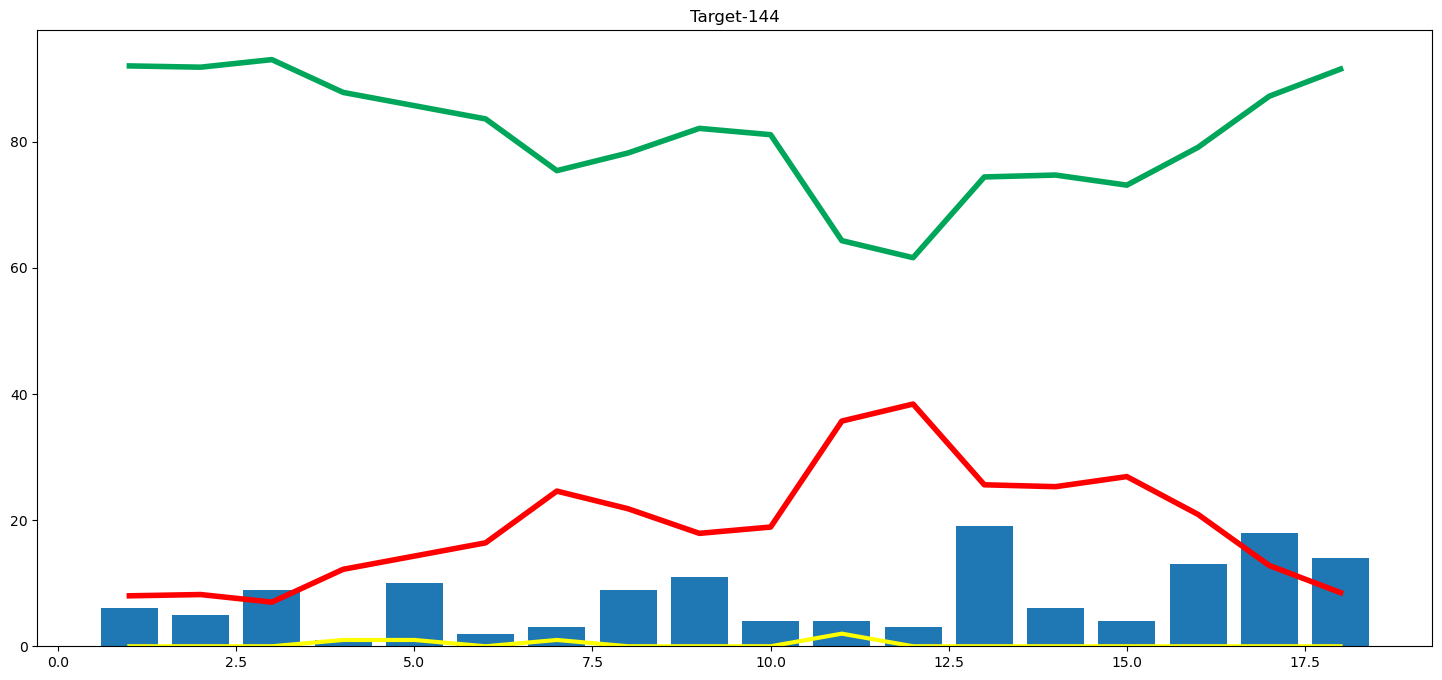

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [67]:
teams

['Royal Challengers Bangalore',
 'Punjab Kings',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [70]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', '1gpur', 'Dharamsala',
       'Visakhapat1m', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', '1',
       'Indore', 'Bengaluru', 'Dubai', 'Sharjah', '1vi Mumbai', 'Lucknow',
       'Guwahati', 'Mohali'], dtype=object)

In [6]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Step 2: Load Data
try:
    match = pd.read_csv('matches_updated.csv')
    delivery = pd.read_csv('modified_deliveries.csv')
except FileNotFoundError as e:
    raise Exception(f"Error: {e}")

# Step 3: Preprocessing
# Dropping columns that are not useful for prediction or have high cardinality
columns_to_drop = ['match_id', 'date', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'method']
match = match.drop(columns=columns_to_drop, axis=1)

# Clean `result_margin` column
match['result_margin_value'] = pd.to_numeric(match['result_margin'], errors='coerce')  # Extract numeric part
match['result_margin_type'] = match['result_margin'].str.extract(r'(\D+)', expand=False).fillna('runs')  # Extract type
match.drop('result_margin', axis=1, inplace=True)  # Drop the original column

# Ensure all numerical columns are numeric
numerical_features = ['result_margin_value', 'target_runs', 'target_overs']
for col in numerical_features:
    match[col] = pd.to_numeric(match[col], errors='coerce')  # Force conversion to numeric, set invalid values to NaN

# Identify categorical features
categorical_features = ['season', 'city', 'match_type', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result_margin_type']

# Splitting features and target
X = match.drop('winner', axis=1)
y = match['winner']

# Step 4: Preprocessing Pipeline
# Preprocessors for numerical and categorical features
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Fill missing numeric values with mean
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply OneHotEncoding
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_features),
        ('cat', categorical_preprocessor, categorical_features)
    ]
)

# Step 5: Model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_model = grid_search.best_estimator_

# Step 6: Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


TypeError: '<' not supported between instances of 'str' and 'float'

In [3]:
# Step 1: Clean Numerical Columns
# Check for non-numeric values in numerical columns
for col in numerical_features:
    if match[col].dtype == 'object':  # Identify object type columns expected to be numeric
        print(f"Non-numeric values in {col}: {match[col].unique()}")

# For 'result_margin', split into numeric values and the type ('wickets' or 'runs')
match['result_margin_value'] = pd.to_numeric(match['result_margin'], errors='coerce')  # Extract numeric part
match['result_margin_type'] = match['result_margin'].str.extract(r'(\D+)', expand=False).fillna('runs')  # Extract type
match.drop('result_margin', axis=1, inplace=True)  # Drop the original column

# Update numerical_features list
numerical_features = ['result_margin_value', 'target_runs', 'target_overs']

# Step 2: Update Preprocessing
# OneHotEncoding for categorical variables and leave numerical as-is
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)  # Keep numeric columns as is
    ]
)

# Step 3: Re-run Grid Search
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate Results
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification


SyntaxError: unterminated string literal (detected at line 39) (1114110408.py, line 39)